<a href="https://colab.research.google.com/github/amanjn7/Airbnb-Booking-Analysis/blob/main/Aman_Jain_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>  Problem Statement
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

 <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

 <u> Explore and analyze the data to discover key understandings (not limited to these) such as :</u>

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

**Importing the required libraries and mounting the drive**

In [8]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

In [4]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')


**First Lets Explore Our Dataset**


Lets dive into the data, we will see top 10 rows, bottom 10 rows, shape, size and Geometry of our data.

In [6]:
Row , Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 48895
Number 0f columns is 16


In [14]:
Columns = df.columns
print(Columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [15]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [16]:
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [18]:
# let's look at the statistical aspects of the dataframes
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

name column has 16 null values.

host_name column has 21 null values.

last_review column has 10052 null values.

reviews_per_month column has 10052 null values.



In [20]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Identifying the relational dependencies in data**

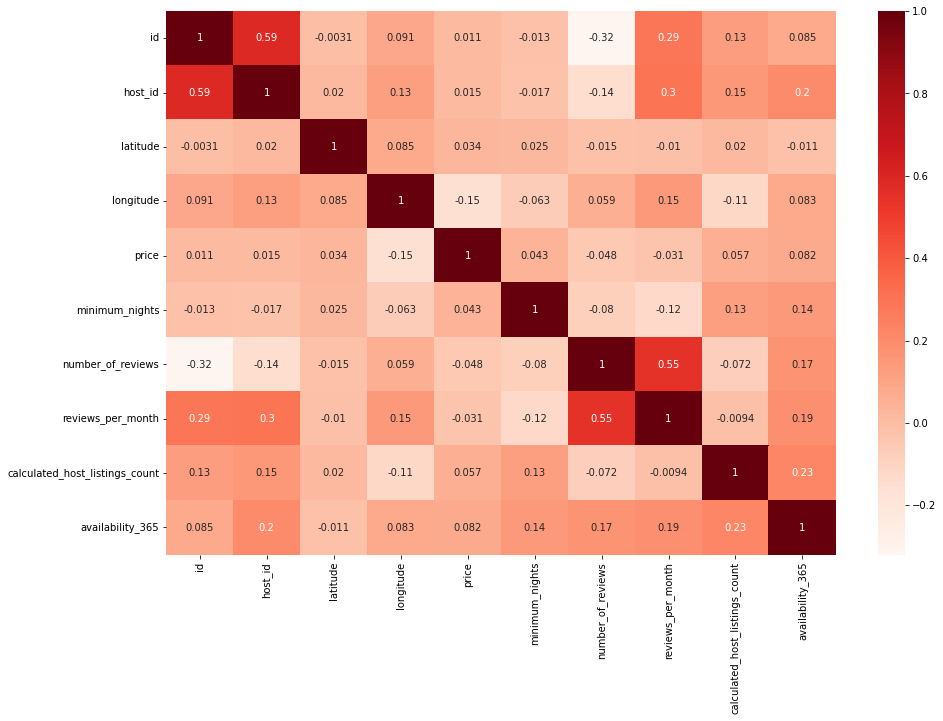

In [21]:
#let's analysize if there is any numerical corelation.
plt.figure(figsize=(15,10))
abnb_corr = df.corr()
heatmap=sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

We did not find any pleasing correlation between numerical variables except number of reviews and reviews per month


**DATA CLEANING**


using `describe` to get a summary statistics of the numeric data, We can see that the data need cleanning, We Observe that there are some outliers for **price and minimum_nights**. Other columns such as **number_of_reviews and calculated_host_listings_count** are skewed toward right, so we need to transfer them into categorical variables.



In [23]:
# Let's check for the Null Values 
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


As we can see there are some Null Values in **host_name**, **name** , **last_review** and **reviews_per_month** 

<u/>**host_name**& **name**</u> : Missing Values are 21 & 16 both are less than 0.5% so will simple drop the rows corresponding to the missing values in those column.

<u/>**last_review** and **reviews_per_month**</u> : we found Null Values are for those properties which doesn't have any reviews. so will replace all the Null values of review_per_month with zero ('0') and drop the **last_review** as column has very high Null Values and negligible relevence with our problem set for EDA.

In [25]:
df.drop(['last_review'], axis=1,inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)

In [26]:
df_nyc=df.dropna(subset=['name', 'host_name'])
#better to double check
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [27]:
df[df.price==0].shape

(11, 15)

We can clearly see the total of eleven entries need to be drop whose price is 0 so going forward excluding those entries having price = 0

In [28]:
df = df[df['price'] !=0]

In [29]:
df.shape

(48884, 15)

**Handling Outliners**

In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


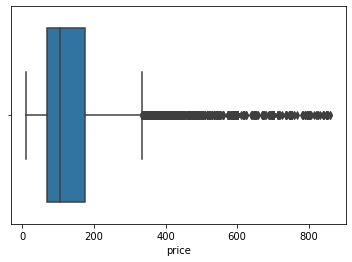

In [35]:
sns.boxplot(x=df['price'])

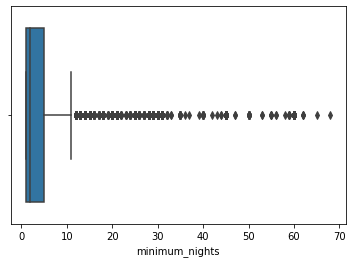

In [36]:
sns.boxplot(x=df['minimum_nights'])

In [31]:
df['z_price'] = np.abs(stats.zscore(df['price']))
df['z_min_nights'] = np.abs(stats.zscore(df['minimum_nights']))

In [32]:
# remove z scroe that are greater than 3

df = df[(df['z_price'] < 3)]
df = df[(df['z_min_nights'] < 3)]

In [33]:
# Droping 'z_price' and 'z_min_nights'
df.drop(['z_price','z_min_nights'],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48186 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48186 non-null  int64  
 1   name                            48171 non-null  object 
 2   host_id                         48186 non-null  int64  
 3   host_name                       48165 non-null  object 
 4   neighbourhood_group             48186 non-null  object 
 5   neighbourhood                   48186 non-null  object 
 6   latitude                        48186 non-null  float64
 7   longitude                       48186 non-null  float64
 8   room_type                       48186 non-null  object 
 9   price                           48186 non-null  int64  
 10  minimum_nights                  48186 non-null  int64  
 11  number_of_reviews               48186 non-null  int64  
 12  reviews_per_month               

# <b> 5. Data Visulaisation</b>

     




**Areas Of Hotels in NYC**

In [9]:
Long=-73.935242
Lat=40.730610
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=10.2)
FastMarkerCluster(data=locations).add_to(map1)
map1

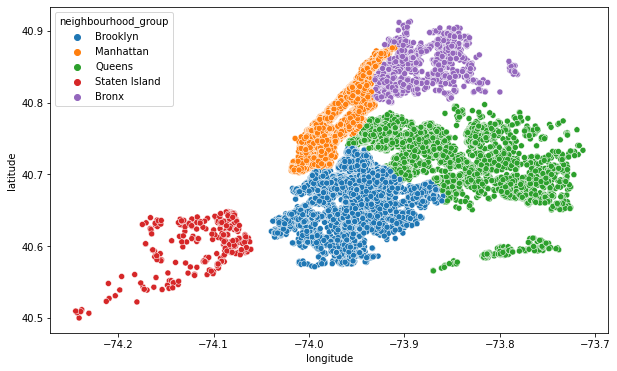

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

**Neighbourhood Group Analysis**

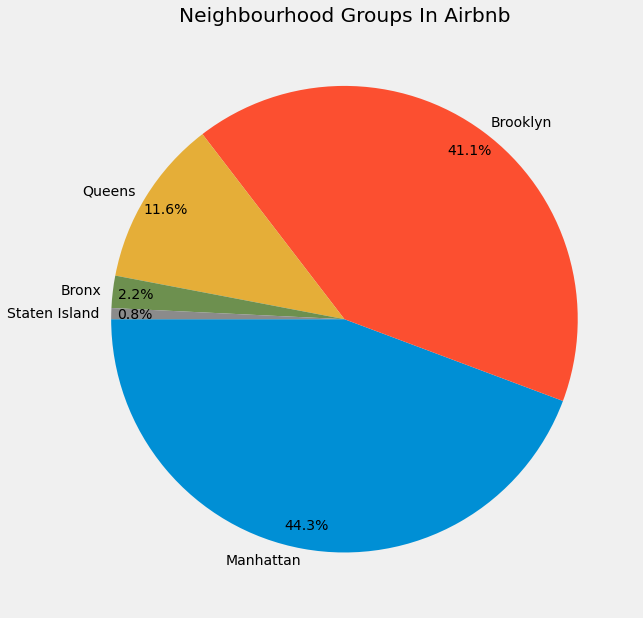

In [11]:
# Neighbourhood Groups in AirBnb
labels = df.neighbourhood_group.value_counts().index
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.title("Neighbourhood Groups In Airbnb")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',pctdistance=.9,labeldistance=1.05, startangle=180)
plt.show()

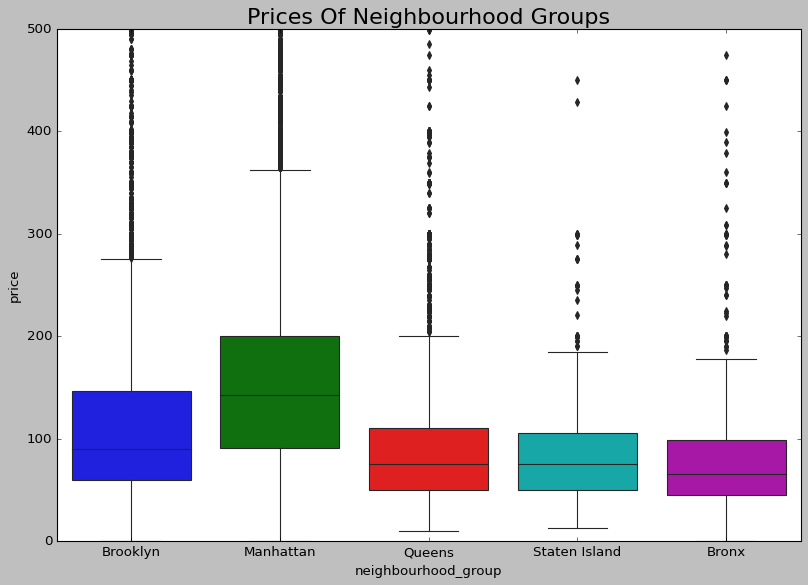

In [12]:
# Prices in Neighbourhood Groups 
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Prices Of Neighbourhood Groups",color = 'black',fontsize = 20)
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df[df.price<500])
plt.show()

<Figure size 960x800 with 0 Axes>

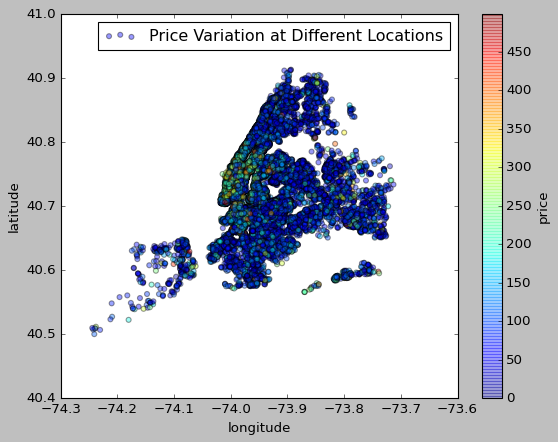

In [13]:
# Price Variations at different locations 
plt.figure(figsize=(12,10))
ax=df[df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Variation at Different Locations',c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

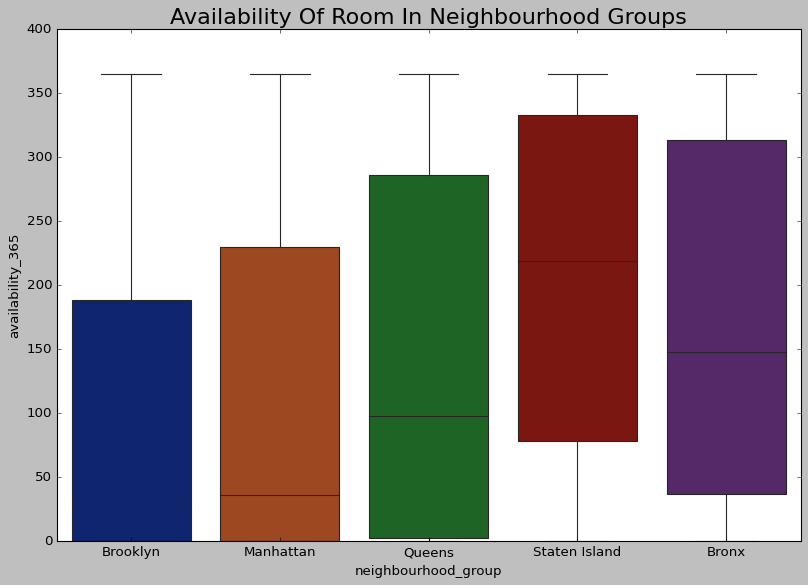

In [14]:
# Availability of Room in Neighbourhood Groups 
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Availability Of Room In Neighbourhood Groups",color = 'black',fontsize = 20)
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show() 

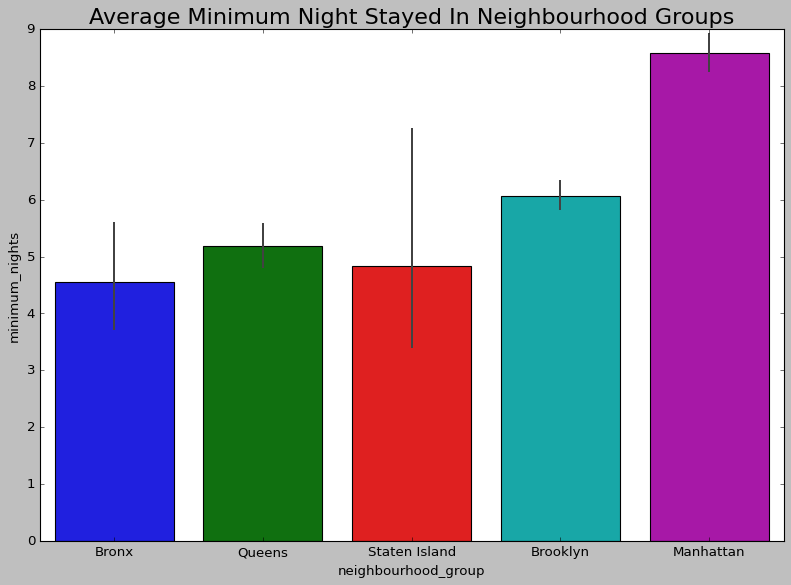

In [15]:
# Minimum Nights stayed in Neighbourhood Groups 
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Minimum Night Stayed In Neighbourhood Groups",color = 'black',fontsize = 20)
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) 
plt.show()

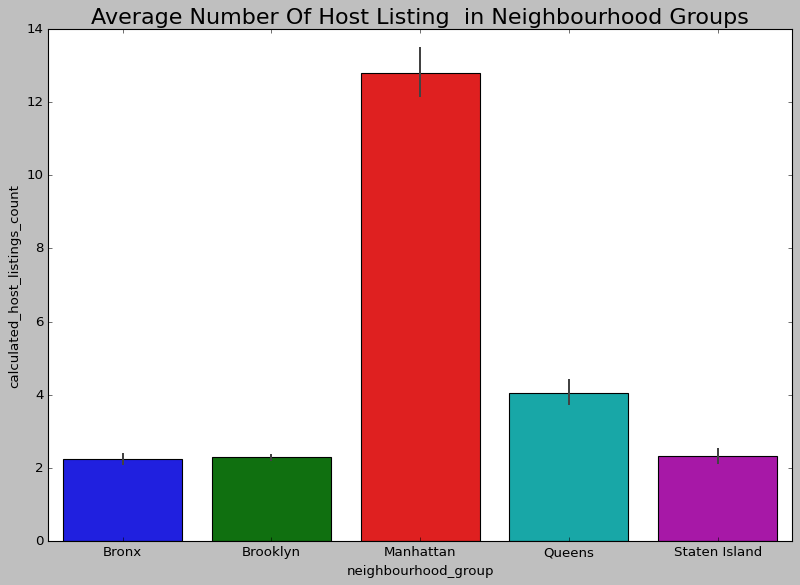

In [16]:
# Number Of Host Listing In Neighbourhood Groups
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Host Listing  in Neighbourhood Groups",color = 'black',fontsize = 20)
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])
plt.show()

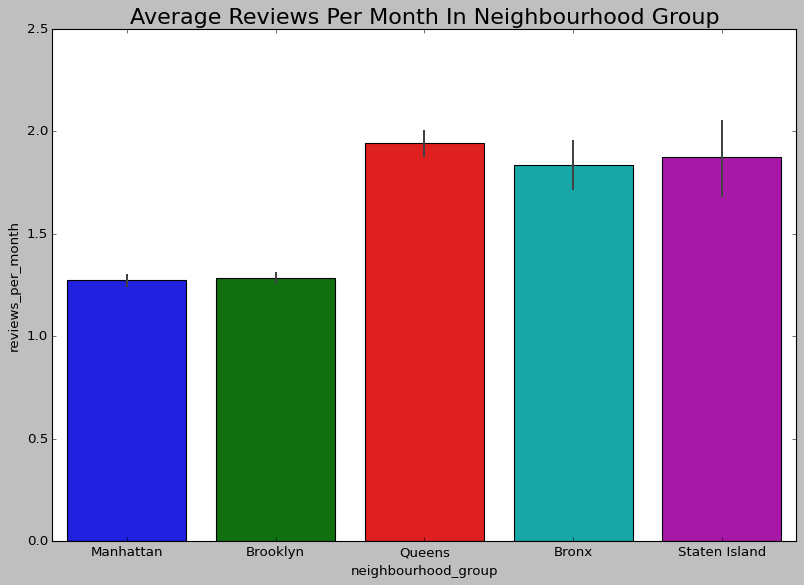

In [17]:
# Reviews Per Month In Neighbourhood Groups
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Reviews Per Month In Neighbourhood Group",color = 'black',fontsize = 20)
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group'])
plt.show()

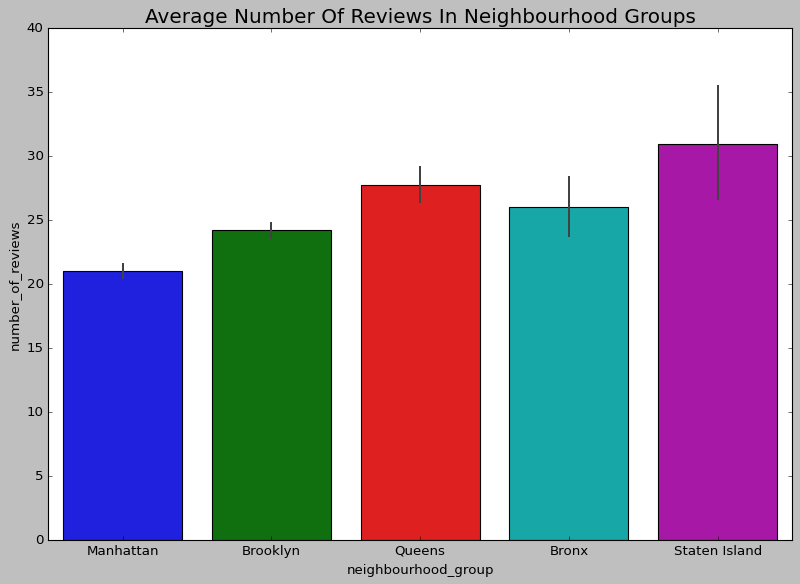

In [18]:
# Average Number Of Reviews In Neighbourhood Groups
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Reviews In Neighbourhood Groups",color = 'black',fontsize = 18)
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group'])
plt.show()

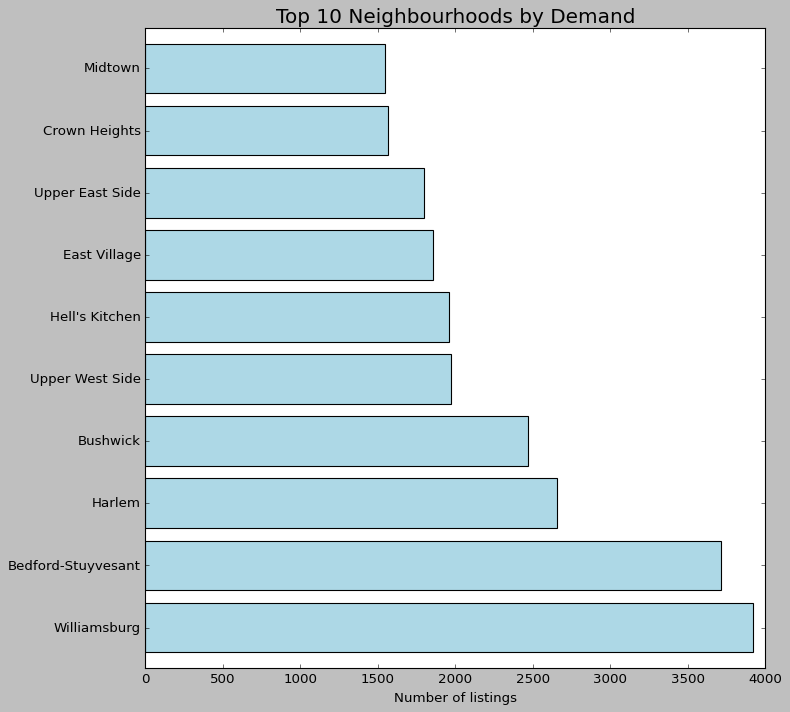

In [19]:
# Top Most Demanded Neighbourhoods in Airbnb 
feq=df['neighbourhood'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), width=0.8, color = 'lightblue')
plt.title("Top 10 Neighbourhoods by Demand", fontsize=18)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

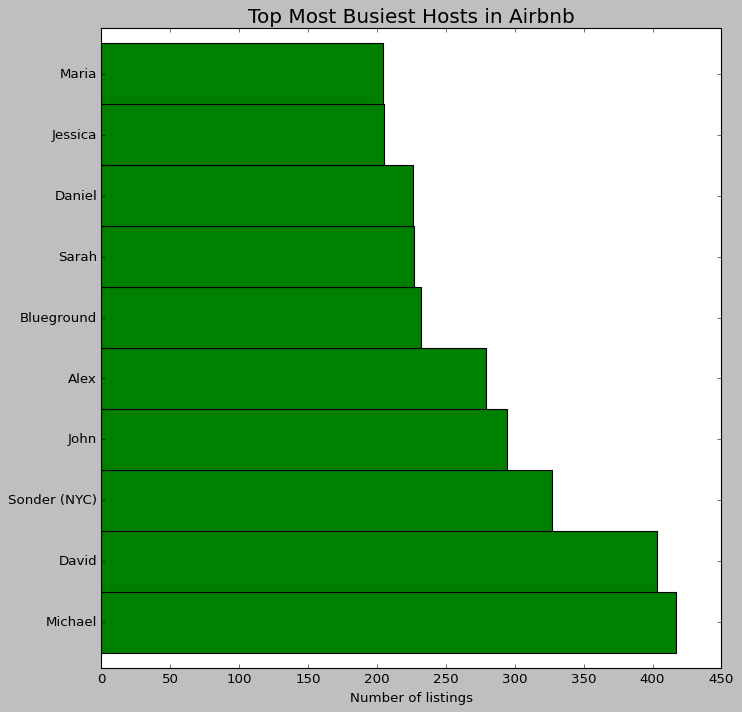

In [21]:
# Top Most Busiest Hosts in Airbnb
feq=df['host_name'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), color= "g", width=1)
plt.title("Top Most Busiest Hosts in Airbnb", fontsize=18)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [26]:
list_apt = df.groupby(['host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_name,neighbourhood,neighbourhood_group,apartment
25263,Sonder (NYC),Financial District,Manhattan,218
13237,John,Hell's Kitchen,Manhattan,55
27583,Vida,Greenpoint,Brooklyn,52
25258,Sonder,Financial District,Manhattan,51
25266,Sonder (NYC),Murray Hill,Manhattan,50
25470,Stanley,Murray Hill,Manhattan,50
22593,Red Awning,Midtown,Manhattan,49
19116,Michael,Williamsburg,Brooklyn,41
14281,Kara,Hell's Kitchen,Manhattan,41
18874,Melissa,Bedford-Stuyvesant,Brooklyn,39


<function matplotlib.pyplot.show>

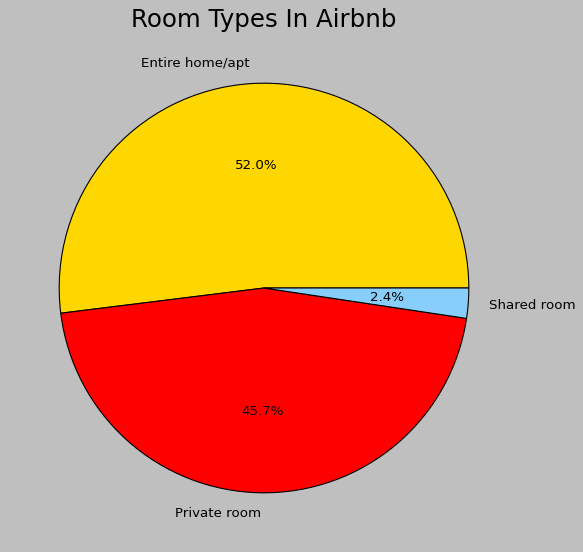

In [27]:
# Room Types In Airbnb

labels = df.room_type.value_counts().index
colors = ['gold','red','lightskyblue']
explode = [0,0,0]
sizes = df.room_type.value_counts().values
plt.figure(0,figsize = (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Room Types In Airbnb',color = 'black',fontsize = 22)
plt.show

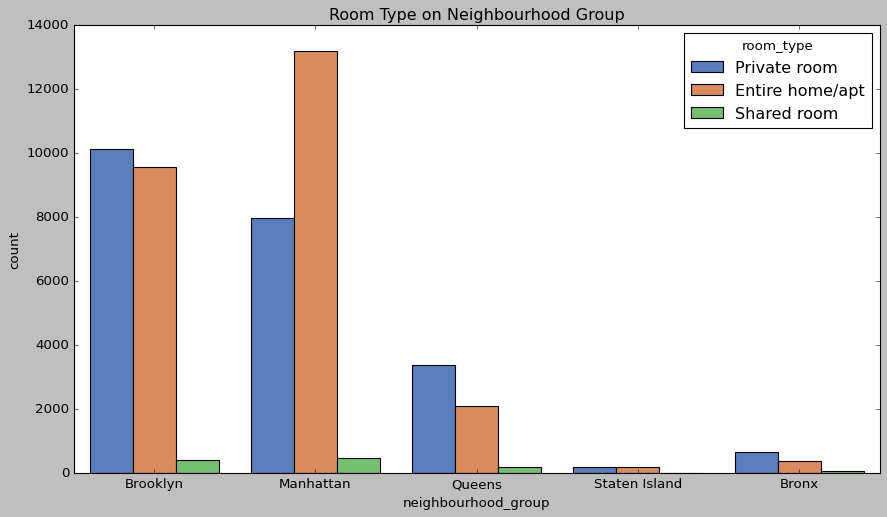

In [28]:
# Booking Of Different Room Type In Neighbourhood Group
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

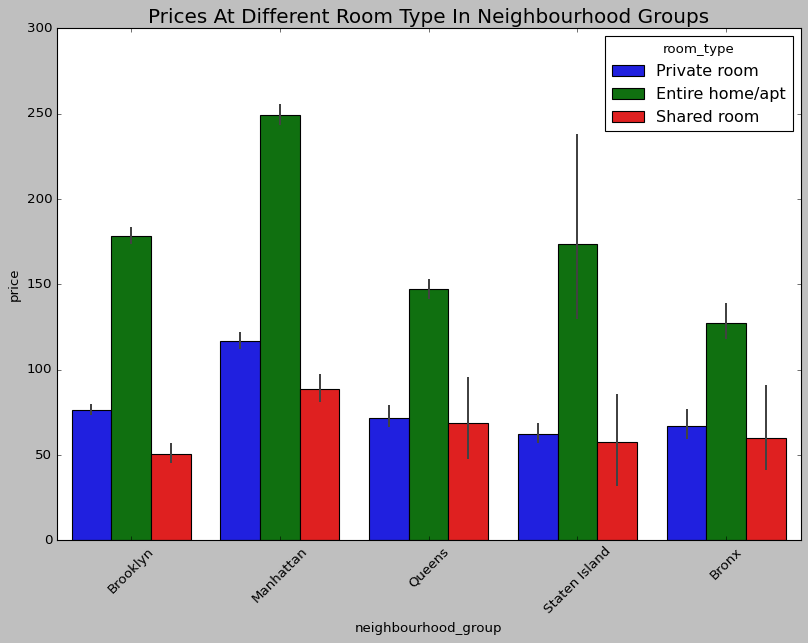

In [29]:
# Prices of different rooms in Neighbourhood Groups  
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Prices At Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

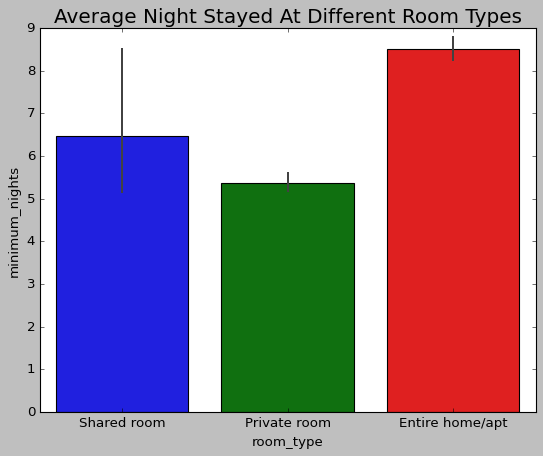

In [30]:
# Average Night Stayed At Different Room Types
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Average Night Stayed At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

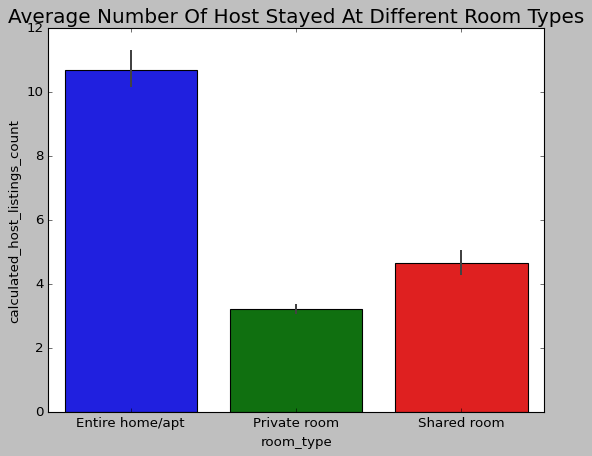

In [31]:
# Average Host Listing At Different Room Types
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Average Number Of Host Stayed At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type'])
plt.show()

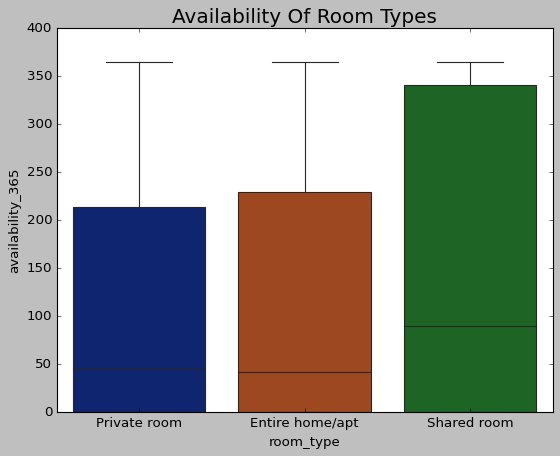

In [32]:
# Availability of different room types 
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Availability Of Room Types",color = 'black',fontsize = 18)
sns.boxplot(data=df, x='room_type',y='availability_365',palette="dark")
plt.show() 

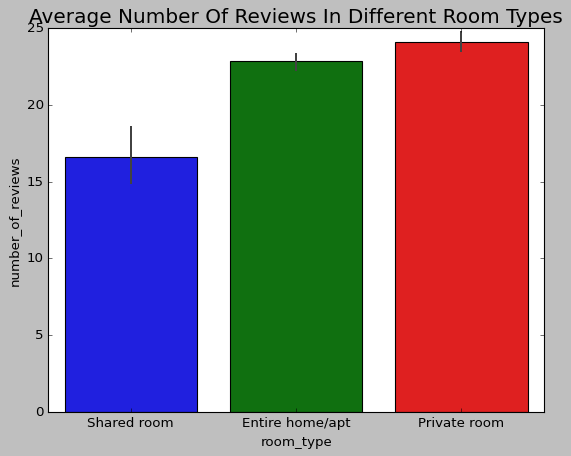

In [33]:
# Average Number Of Reviews In Different Room Types
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Average Number Of Reviews In Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type'])
plt.show()

<Figure size 800x960 with 0 Axes>

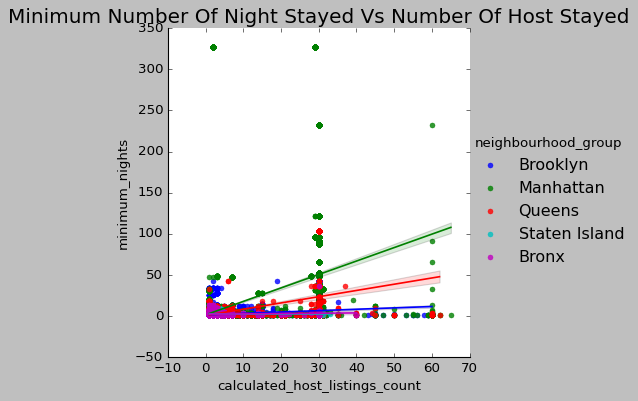

In [ ]:
plt.figure(figsize=(10,12))
#plt.style.use('classic')
sns.lmplot(x='minimum_nights',y='calculated_host_listings_count',hue="neighbourhood_group",data=df)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('minimum_nights')
plt.title('Minimum Number Of Night Stayed Vs Number Of Host Stayed',color = 'black',fontsize = 18)
plt.show()